## Data Visualisation

This file displays the catalog information from the GZ1 dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
catalog = pd.read_csv('..\Data\gz1_desi_cross_cat.csv')

In [4]:
print(f"Number of galaxies in GZ1 catalogue: {catalog.shape[0]}")
print(f"Columns: {catalog.columns.values}")

Number of galaxies in GZ1 catalogue: 647837
Columns: ['Unnamed: 0' 'OBJID' 'RA' 'DEC' 'NVOTE' 'P_EL' 'P_CW' 'P_ACW' 'P_EDGE'
 'P_DK' 'P_MG' 'P_CS' 'P_EL_DEBIASED' 'P_CS_DEBIASED' 'SPIRAL'
 'ELLIPTICAL' 'UNCERTAIN' 'dr8_id']


## Number of votes per object

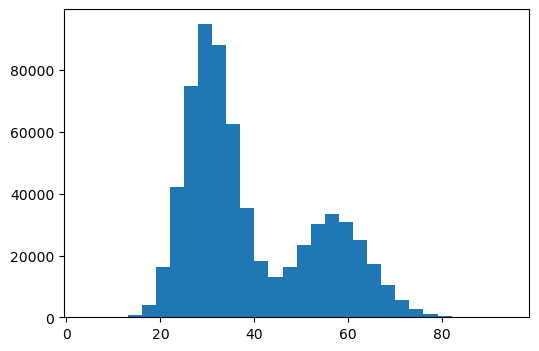

In [5]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot() 
ax.hist(catalog['NVOTE'],bins=30)
plt.show()

## Probabilities for galaxy types

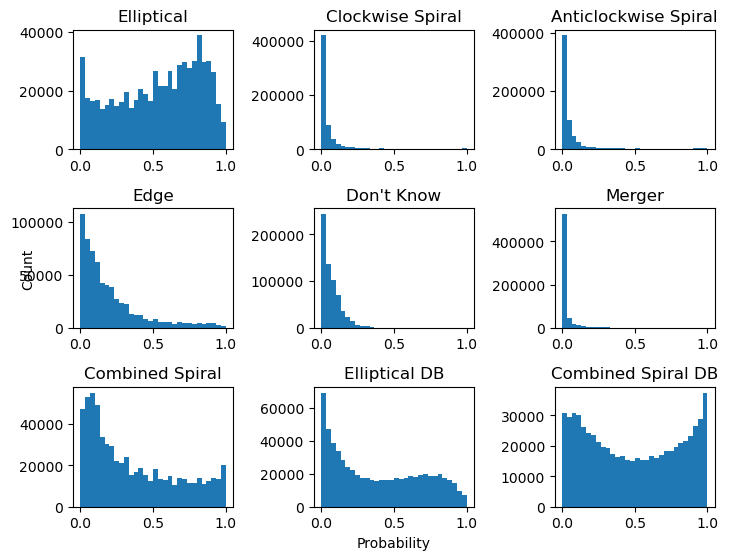

In [23]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlabel("Probability")
ax.set_ylabel("Count")
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

labels = ["Elliptical","Clockwise Spiral","Anticlockwise Spiral","Edge","Don't Know","Merger","Combined Spiral","Elliptical DB","Combined Spiral DB"]
for i, votetype in enumerate(catalog.columns.values[5:14]):
    ax_i = fig.add_subplot(3,3,i+1)
    ax_i.hist(catalog[votetype],bins=30)
    ax_i.set_title(labels[i])
plt.tight_layout()
plt.show()

In [11]:
very_CW_galaxies = catalog[catalog['P_CW']>0.8]
print(f"Number of very CW galaxies in GZ1 catalogue: {very_CW_galaxies.shape[0]}")

very_ACW_galaxies = catalog[catalog['P_ACW']>0.8]
print(f"Number of very ACW galaxies in GZ1 catalogue: {very_ACW_galaxies.shape[0]}")
very_CW_galaxies.head(10)

very_EL_galaxies = catalog[catalog['P_EL']>0.8]
print(f"Number of very EL galaxies in GZ1 catalogue: {very_EL_galaxies.shape[0]}")
very_CW_galaxies.head(10)

Number of very CW galaxies in GZ1 catalogue: 14243
Number of very ACW galaxies in GZ1 catalogue: 15420
Number of very EL galaxies in GZ1 catalogue: 143858


,Unnamed: 0,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN,dr8_id
5,5,587727177912811659,00:02:05.65,-11:12:38.1,33,0.061,0.818,0.000,0.121,0.000,0.000,0.939,0.034,0.966,1,0,0,265946_2961
107,107,587727177917923465,00:49:25.29,-11:09:50.5,62,0.000,0.968,0.032,0.000,0.000,0.000,1.000,0.000,1.000,1,0,0,265992_3062
199,199,587727225154764940,00:13:45.19,-10:56:11.6,40,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1,0,0,267371_3388
232,232,587727225155354763,00:19:09.98,-10:53:08.7,31,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1,0,0,267376_4284
258,258,587727225156141259,00:26:46.21,-10:57:38.8,29,0.000,0.862,0.034,0.069,0.034,0.000,0.966,0.000,0.966,1,0,0,267384_3393
276,276,587727177915826302,00:30:07.31,-11:06:49.1,33,0.030,0.909,0.000,0.030,0.000,0.030,0.939,0.030,0.939,1,0,0,267387_53
277,277,587727225156665442,00:31:23.71,-11:01:31.2,28,0.036,0.929,0.000,0.036,0.000,0.000,0.964,0.036,0.964,1,0,0,267388_1790
393,393,587727177918382117,00:53:31.26,-11:04:22.7,27,0.037,0.926,0.000,0.000,0.000,0.037,0.926,0.010,0.952,1,0,0,267410_918
436,436,587727177919103032,01:00:13.43,-11:02:31.8,48,0.042,0.833,0.062,0.062,0.000,0.000,0.958,0.042,0.958,1,0,0,267417_1556
442,442,587727177919037514,01:00:04.13,-11:04:57.4,33,0.000,0.970,0.030,0.000,0.000,0.000,1.000,0.000,1.000,1,0,0,267417_591
